In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

100% 987M/987M [00:26<00:00, 43.3MB/s]
100% 987M/987M [00:26<00:00, 38.8MB/s]


In [ ]:
!unzip speech-emotion-recognition-en.zip

In [147]:
Tess    = "/content/drive/MyDrive/Colab Notebooks/Pattern/projects/Assignment3/data/Tess"
Savee   = "/content/drive/MyDrive/Colab Notebooks/Pattern/projects/Assignment3/data/Savee"
Ravdess = "/content/drive/MyDrive/Colab Notebooks/Pattern/projects/Assignment3/data/Ravdess/audio_speech_actors_01-24"
Crema   = "/content/drive/MyDrive/Colab Notebooks/Pattern/projects/Assignment3/data/Crema"

EMOTIONS_DICT_RAVDESS = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}
EMOTIONS_DICT_SAVEE = {'a' :'angry', 'd' :'disgust', 'f' :'fear', 'h' :'happy', 'n' :'neutral', 'sa': 'sad', 'su': 'surprise'}
EMOTIONS_DICT_CREMA = {'SAD' :'sad', 'ANG' :'angry', 'DIS' :'disgust', 'FEA' :'fear', 'HAP' :'happy', 'NEU' :'neutral'}

COLUMNS_NAMES = ['Path', 'Emotion']

In [183]:
import os

import pandas as pd
import numpy as np

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio

### Loading Data:

#### Tess data:

In [103]:
tess_emo_list = sorted(os.listdir(Tess))
tess_wav_emotions = []
for emo_folder in tess_emo_list:
    emo_waves = sorted(os.listdir(Tess+'/'+emo_folder))
    for wav_file in emo_waves:
        path = Tess+'/'+emo_folder+'/'+wav_file
        emotion = wav_file.split('.')[0].split('_')[2]
        tess_wav_emotions.append([path ,emotion])


In [104]:
tess_wav_emotions_df = pd.DataFrame(tess_wav_emotions, columns=COLUMNS_NAMES)
tess_wav_emotions_df['Emotion'].replace({'ps':'surprise'}, inplace=True)
tess_wav_emotions_df.head()

,Path,Emotion
0,/content/drive/MyDrive/Colab Notebooks/Pattern...,fear
1,/content/drive/MyDrive/Colab Notebooks/Pattern...,fear
2,/content/drive/MyDrive/Colab Notebooks/Pattern...,fear
3,/content/drive/MyDrive/Colab Notebooks/Pattern...,fear
4,/content/drive/MyDrive/Colab Notebooks/Pattern...,fear


In [110]:
tess_wav_emotions_df.shape

(2800, 2)

In [105]:
tess_wav_emotions_df['Emotion'].value_counts()

fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Name: Emotion, dtype: int64

#### Savee data:

In [148]:
savee_emo_waves = os.listdir(Savee)
savee_wav_emotions = []
for wav_file in savee_emo_waves:
    path = Savee+'/'+wav_file
    emotion = wav_file.split('.')[0].split('_')[1]
    emotion = ''.join((char for char in emotion if not char.isdigit()))
    savee_wav_emotions.append([path, emotion])

In [149]:
savee_wav_emotions_df = pd.DataFrame(savee_wav_emotions, columns=COLUMNS_NAMES)
savee_wav_emotions_df['Emotion'].replace(EMOTIONS_DICT_SAVEE, inplace=True)

savee_wav_emotions_df.head()

,Path,Emotion
0,/content/drive/MyDrive/Colab Notebooks/Pattern...,angry
1,/content/drive/MyDrive/Colab Notebooks/Pattern...,angry
2,/content/drive/MyDrive/Colab Notebooks/Pattern...,angry
3,/content/drive/MyDrive/Colab Notebooks/Pattern...,angry
4,/content/drive/MyDrive/Colab Notebooks/Pattern...,angry


In [150]:
savee_wav_emotions_df.shape

(480, 2)

In [151]:
savee_wav_emotions_df['Emotion'].value_counts()

neutral     120
angry        60
fear         60
disgust      60
happy        60
sad          60
surprise     60
Name: Emotion, dtype: int64

#### Ravdess data:

In [115]:
ravdess_actors_list = sorted(os.listdir(Ravdess))
ravdess_wav_emotions = []
for actor_folder in ravdess_actors_list:
    actor_waves = os.listdir(Ravdess+'/'+actor_folder)
    for wav_file in actor_waves:
        path = Ravdess+'/'+actor_folder+'/'+wav_file
        emotion = wav_file.split('.')[0].split('-')[2]
        ravdess_wav_emotions.append([path, int(emotion)])

In [116]:
ravdess_wav_emotions_df = pd.DataFrame(ravdess_wav_emotions, columns=COLUMNS_NAMES)
ravdess_wav_emotions_df['Emotion'].replace(EMOTIONS_DICT_RAVDESS, inplace=True) 

ravdess_wav_emotions_df.head()

,Path,Emotion
0,/content/drive/MyDrive/Colab Notebooks/Pattern...,sad
1,/content/drive/MyDrive/Colab Notebooks/Pattern...,calm
2,/content/drive/MyDrive/Colab Notebooks/Pattern...,neutral
3,/content/drive/MyDrive/Colab Notebooks/Pattern...,sad
4,/content/drive/MyDrive/Colab Notebooks/Pattern...,happy


In [117]:
ravdess_wav_emotions_df.shape

(1440, 2)

In [118]:
ravdess_wav_emotions_df['Emotion'].value_counts()

sad         192
calm        192
happy       192
angry       192
surprise    192
fear        192
disgust     192
neutral      96
Name: Emotion, dtype: int64

#### Crema data:

In [140]:
crema_emp_waves = os.listdir(Crema)
crema_wav_emotions = []
for wav_file in crema_emp_waves:
    path = Crema + '/' + wav_file
    emotion = wav_file.split('.')[0].split('_')[2]
    crema_wav_emotions.append([path, emotion])

In [141]:
crema_wav_emotions_df = pd.DataFrame(crema_wav_emotions, columns=COLUMNS_NAMES)
crema_wav_emotions_df['Emotion'].replace(EMOTIONS_DICT_CREMA, inplace=True)

crema_wav_emotions_df.head()

,Path,Emotion
0,/content/drive/MyDrive/Colab Notebooks/Pattern...,disgust
1,/content/drive/MyDrive/Colab Notebooks/Pattern...,disgust
2,/content/drive/MyDrive/Colab Notebooks/Pattern...,angry
3,/content/drive/MyDrive/Colab Notebooks/Pattern...,angry
4,/content/drive/MyDrive/Colab Notebooks/Pattern...,sad


In [142]:
crema_wav_emotions_df['Emotion'].value_counts()

disgust    1271
angry      1271
sad        1271
fear       1271
happy      1271
neutral    1087
Name: Emotion, dtype: int64

#### All data:

In [152]:
print(ravdess_wav_emotions_df.shape)
print(crema_wav_emotions_df.shape)
print(tess_wav_emotions_df.shape)
print(savee_wav_emotions_df.shape)

(1440, 2)
(7442, 2)
(2800, 2)
(480, 2)


In [153]:
all_data = pd.concat([ravdess_wav_emotions_df, crema_wav_emotions_df, tess_wav_emotions_df, savee_wav_emotions_df], axis = 0)
all_data.head()

,Path,Emotion
0,/content/drive/MyDrive/Colab Notebooks/Pattern...,sad
1,/content/drive/MyDrive/Colab Notebooks/Pattern...,calm
2,/content/drive/MyDrive/Colab Notebooks/Pattern...,neutral
3,/content/drive/MyDrive/Colab Notebooks/Pattern...,sad
4,/content/drive/MyDrive/Colab Notebooks/Pattern...,happy


In [154]:
all_data.shape

(12162, 2)

In [155]:
all_data['Emotion'].value_counts()

sad         1923
happy       1923
angry       1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: Emotion, dtype: int64

<Axes: >

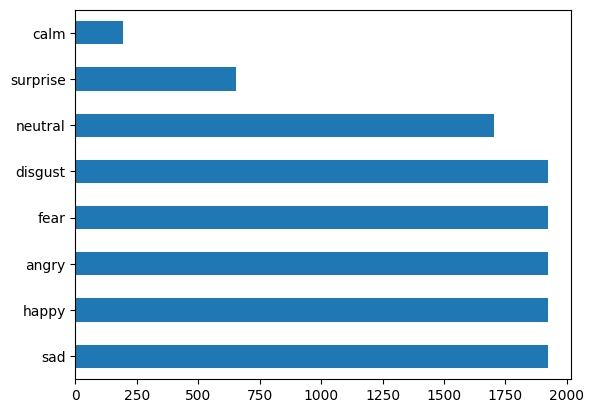

In [175]:
all_data['Emotion'].value_counts().plot(kind='barh')

### part 2